# K-MEANS Prof

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


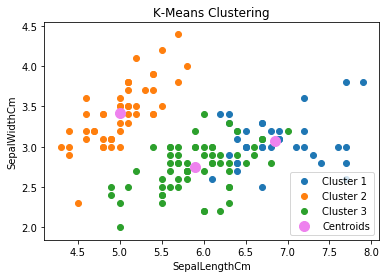

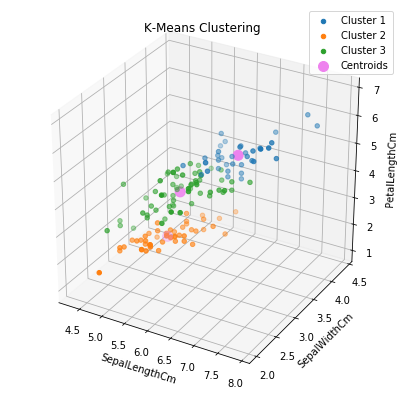

C:\python\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


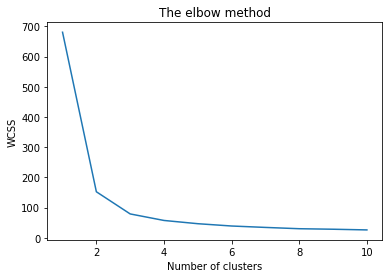

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d

dataset = pd.read_csv('iris.csv')
x = dataset.iloc[:, 1:-1].values

# apply kmeans to the dataset
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(x)
print(clusters)

# plot clustered data
for i in np.unique(clusters):
    plt.scatter(x=x[clusters==i,0], y=x[clusters==i,1],
                label='Cluster ' + str(i + 1))

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1],
            s=100, c='violet', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel(dataset.columns[1])
plt.ylabel(dataset.columns[2])
plt.legend()
plt.show()

# 3d plot
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    ax.scatter3D(xs=x[clusters==i,0],
             ys=x[clusters==i,1],
             zs=x[clusters==i,2],
            label='Cluster ' + str(i + 1))

# print('centers = ', kmeans.cluster_centers_)
# print('centers = ', kmeans.cluster_centers_[:,0])

# plotting the centroids of the clusters
ax.scatter3D(xs=kmeans.cluster_centers_[:, 0], 
            ys=kmeans.cluster_centers_[:,1],
            zs=kmeans.cluster_centers_[:,2],
            s=100, c='violet', label='Centroids')

plt.title('K-Means Clustering')
ax.set_xlabel(dataset.columns[1])
ax.set_ylabel(dataset.columns[2])
ax.set_zlabel(dataset.columns[3])
plt.legend()
plt.show()


# part 2: Find the optimum number of clusters for k-means
# using within-cluster sum of squares (wcss)
wcss = []

# trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X=x)
    wcss.append(kmeans.inertia_)

# plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()


No handles with labels found to put in legend.


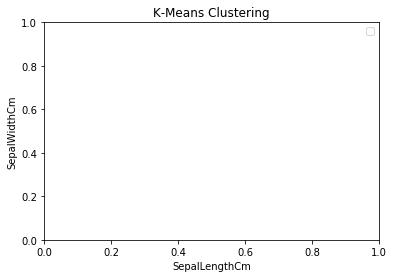

In [4]:
plt.title('K-Means Clustering')
plt.xlabel(dataset.columns[1])
plt.ylabel(dataset.columns[2])
plt.legend()
plt.show()

# K-MEANS WORKSHOP

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
   0
0  2
1  2
2  2
3  2
4  2
Cluster 0:  ['Trinidad and Tobago' 'El Salvador' 'Guatemala' 'Uzbekistan' 'Slovakia'
 'Japan' 'South Korea' 'Ecuador' 'Bahrain' 'Italy' 'Bolivia' 'Moldova'
 'Paraguay' 'Kazakhstan' 'Slovenia' 'Lithuania' 'Nicaragua' 'Peru'
 'Belarus' 'Poland' 'Malaysia' 'Croatia' 'Libya' 'Russia' 'Jamaica'
 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo' 'Turkmenistan' 'Mauritius'
 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam' 'Turkey' 'Kyrgyzstan'
 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan' 'Montenegro' 'China'
 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia' 'Philippines'
 'Somaliland region' 'Morocco' 'Macedonia' 'Albania'
 'Bosnia and Herzegovina' 'Do

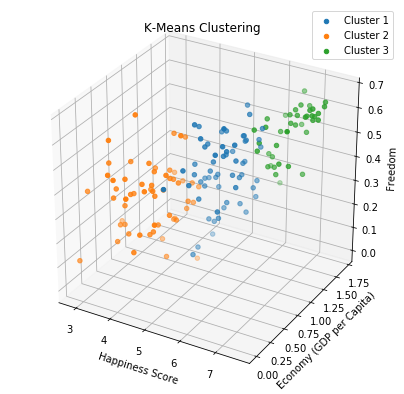

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


dataset = pd.read_csv('happiness_index.csv')
x = dataset[['Happiness Score', 'Economy (GDP per Capita)', 
	'Family', 'Health (Life Expectancy)', 'Freedom']].values

# applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(x)

print(clusters)
df = pd.DataFrame(clusters)
print(df.head())
# first parameter "clusters==0" or "clusters==1" is
# to get a boolean array (e.g. [True, False, True, True, ..., False])
# second parameter for iloc is 0 because we want to get Country Name
print('Cluster 0: ', dataset.iloc[clusters==0, 0].values, '\n')
print('Cluster 1: ', dataset.iloc[clusters==1, 0].values, '\n')
print('Cluster 2: ', dataset.iloc[clusters==2, 0].values)

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
	TF_array = (clusters==i)	# get all rows that belongs to a particular cluster
	ax.scatter3D(x[TF_array,0], x[TF_array,1],
    	x[TF_array,4], label='Cluster ' + str(i + 1))
    
ax.set_xlabel(dataset.columns[1])
ax.set_ylabel(dataset.columns[3])
ax.set_zlabel(dataset.columns[6])
plt.title('K-Means Clustering')
plt.legend()
plt.show()